# Churn Risk Score Prediction

### Link to the Dataset: [Churn Risk Rate](https://www.kaggle.com/imsparsh/churn-risk-rate-hackerearth-ml?select=train.csv)

### Importing Libraries

In [1]:
import pandas as pd
from sklearn import preprocessing  
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

### Getting Data

In [2]:
df = pd.read_csv('train.csv')
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [4]:
df = df.drop(['Name', 'referral_id'], axis=1)  # dropping unnecessary columns 
df

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,31,F,SVZXCWB,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,Credit/Debit Card Offers,Desktop,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [5]:
label_encoder = preprocessing.LabelEncoder()  # encoding data

In [6]:
a = df.columns
for i in a[:-1]:
  df[i] = df[i].astype('|S')
  df[i] = label_encoder.fit_transform(df[i])
df  

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,32243,8,0,34811,2,3,959,1,1,0,...,12869,30769,746,20503,1,1,0,1,4,2
1,7055,22,0,5804,0,4,970,0,1,2,...,13051,2199,732,23699,1,0,1,2,5,1
2,5910,34,0,1534,1,2,680,2,1,2,...,19239,8374,779,4792,0,1,1,3,3,5
3,32400,27,1,32501,0,2,667,2,1,2,...,19546,11560,1637,7111,0,1,1,4,3,5
4,6070,21,0,29819,0,2,985,1,0,3,...,3123,10936,743,12218,0,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,29660,36,0,6692,3,0,994,1,0,2,...,732,13097,1637,10708,0,1,1,0,0,4
36988,16761,19,0,2204,1,0,543,1,2,3,...,697,814,809,5785,1,0,0,1,1,5
36989,27942,13,0,34476,3,0,619,2,1,2,...,6497,21410,1653,13391,0,1,1,4,3,4
36990,1923,43,1,21020,2,3,896,1,1,3,...,18479,10433,774,2601,1,1,0,1,0,3


In [7]:
df['churn_risk_score'].isnull().any()  # checking for and removing records with null values

False

In [8]:
df = df.dropna(axis = 0, how ='any')

In [9]:
df.isnull().any()

customer_id                     False
age                             False
gender                          False
security_no                     False
region_category                 False
membership_category             False
joining_date                    False
joined_through_referral         False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
dtype: bool

In [10]:
df

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,32243,8,0,34811,2,3,959,1,1,0,...,12869,30769,746,20503,1,1,0,1,4,2
1,7055,22,0,5804,0,4,970,0,1,2,...,13051,2199,732,23699,1,0,1,2,5,1
2,5910,34,0,1534,1,2,680,2,1,2,...,19239,8374,779,4792,0,1,1,3,3,5
3,32400,27,1,32501,0,2,667,2,1,2,...,19546,11560,1637,7111,0,1,1,4,3,5
4,6070,21,0,29819,0,2,985,1,0,3,...,3123,10936,743,12218,0,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,29660,36,0,6692,3,0,994,1,0,2,...,732,13097,1637,10708,0,1,1,0,0,4
36988,16761,19,0,2204,1,0,543,1,2,3,...,697,814,809,5785,1,0,0,1,1,5
36989,27942,13,0,34476,3,0,619,2,1,2,...,6497,21410,1653,13391,0,1,1,4,3,4
36990,1923,43,1,21020,2,3,896,1,1,3,...,18479,10433,774,2601,1,1,0,1,0,3


### Data Visualization

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

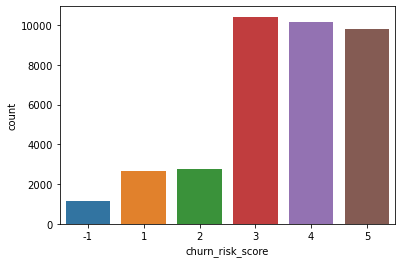

In [11]:
# checking the distribution of outcomes
sns.countplot(x = 'churn_risk_score', data = df)

### Checking Variance

In [12]:
df.columns

Index(['customer_id', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

In [13]:
# checking variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['customer_id', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [14]:
vif

,VIF,Features
0,3.910796,customer_id
1,3.776851,age
2,1.973706,gender
3,3.856613,security_no
4,2.071923,region_category
5,2.929538,membership_category
6,3.858486,joining_date
7,4.193386,joined_through_referral
8,2.443468,preferred_offer_types
9,4.428789,medium_of_operation


### VIF is less than 10 for all the attributes, hence, we can keep them all.

### Splitting Data for Training and Testing

In [15]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

### Decision Tree Model 

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions

In [17]:
pred = clf.predict(X_test)

### Checking Accuracy

In [18]:
score = clf.score(X_test, y_test)
score

0.706176510339235

### Predictions are 71% accurate.

### Visualizing the Decision Tree

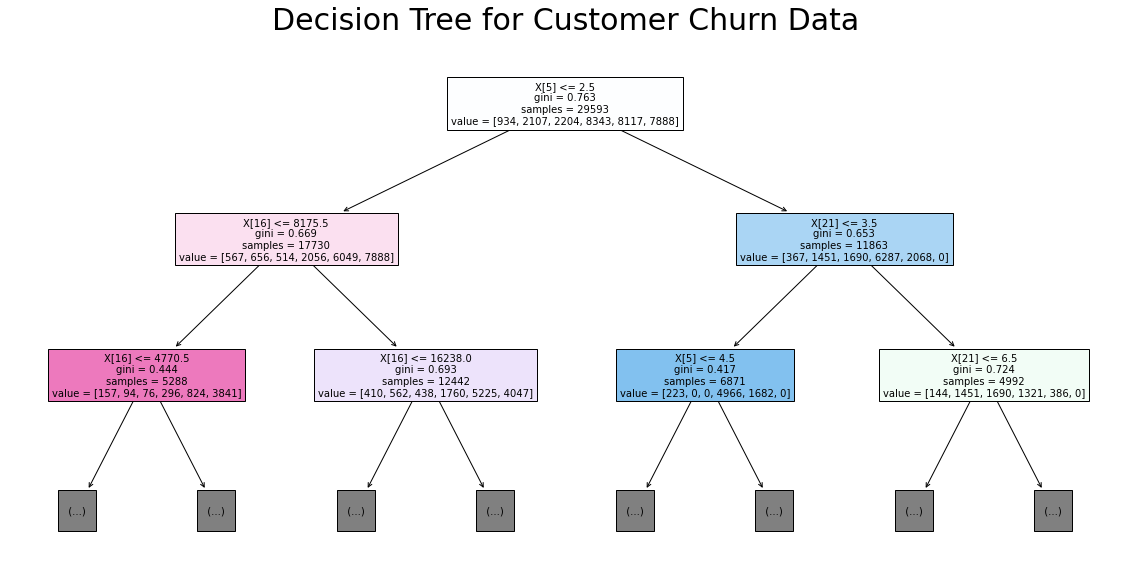

In [19]:
s = plt.figure(figsize=(20,10))
tree.plot_tree(clf, max_depth=2, filled=True, fontsize=10)
plt.title("Decision Tree for Customer Churn Data", fontsize=30)
plt.show() 